# Adatelemzes `pandas`-szal

Eloszor is be kell tolteni a `pandas`-t, tipikusan igy szokas, `pd`-re aliasolva:

In [1]:
import pandas as pd

## Pelda irisz virag adatokon

A mellekelt CSV fajlban levo adatokat egy `DataFrame`-be betolteni ennyi:

In [2]:
data = pd.read_csv("iris_extended.csv")

`DataFrame`-re egyelore gondoljunk ugy, mint egy Excel tabla, ahol az oszlopoknak cimkei vannak.

Ha csak bizonyos oszlopokat szeretnenk "kivenni", akkor azt igy tehetjuk meg:

In [9]:
data[['species','sepal_length', 'petal_length']]

,species,sepal_length,petal_length
0,setosa,5.16,1.64
1,setosa,5.48,1.53
2,setosa,5.10,1.47
3,setosa,4.64,1.53
4,setosa,4.85,1.23
...,...,...,...
1195,virginica,5.36,5.16
1196,virginica,7.49,7.68
1197,virginica,6.79,4.72
1198,virginica,6.38,5.30


Most kerjuk le, hogy a `species` oszlopban milyen ertekek fordulnak elo:

In [8]:
species = data.species.unique()
print(species)

['setosa' 'versicolor' 'virginica']


Amivel itt foglalkozni fogunk, azok a szirmok (petal) es cseszelevelek (sepal) hosszusaga, illetve hogy azok az egyes fajoknal mennyire ternek el.

Elso korben vizsgaljuk meg a ketto aranyat, ehhez kellene egy oszlop, ahol ez szerepel. (megj: mar eleve van, de tegyuk fel, hogy nincs.). Ha egy uj oszlopot szeretnenk, aminek a tartalmat az elozoek alapjan tudjuk kiszamolni, azt igy tehetjuk meg:

In [10]:
data['sepal_petal_length_ratio'] = data['petal_length'] / data['sepal_length']

Egy boxploton nezzuk meg, ezek milyen ertekeket vesznek fel:

<AxesSubplot:>

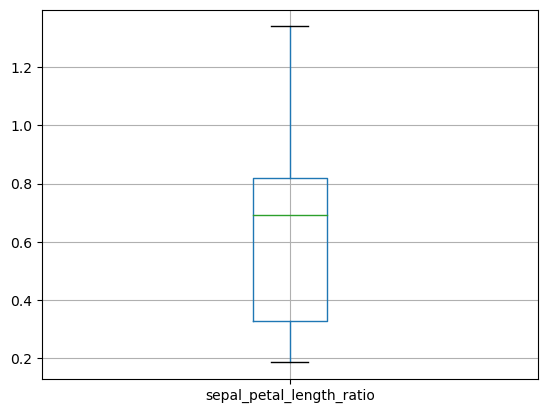

In [16]:
data.boxplot(column="sepal_petal_length_ratio")

Ez igy rendben, de peldaul van-e fajok kozott kulonbseg ebben az aranyban? Csoportositast a `by = "columname"`-el lehet megtenni:

<AxesSubplot:title={'center':'sepal_petal_length_ratio'}, xlabel='species'>

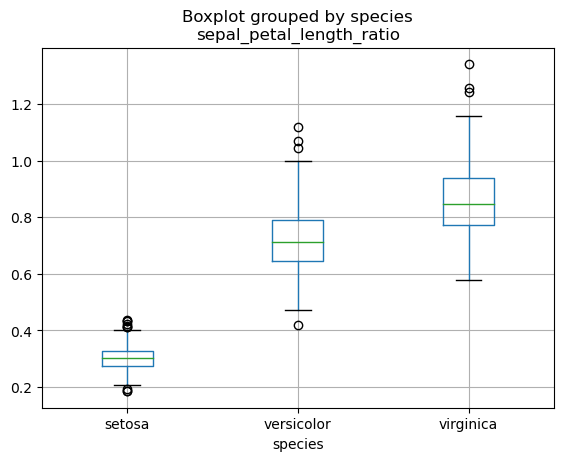

In [17]:
data.boxplot(column="sepal_petal_length_ratio", by="species")

Jol latszodik, hogy az arany egesz mas a harom fajnal, illetve az is, hogy a setosa-nal sokkal kisebb a szoras. Ezutan az absozlutertekben mert hosszokat is erdemes megnezni, de elott meg nezzuk meg, hogy a talajtipus befolyasolja-e ezt:

<AxesSubplot:title={'center':'sepal_petal_length_ratio'}, xlabel='soil_type'>

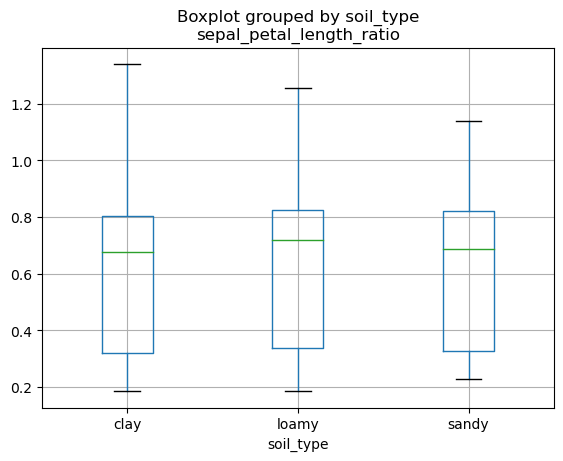

In [21]:
data.boxplot(column="sepal_petal_length_ratio", by="soil_type")

Latszik, hogy itt nincs ilyen radikalis kulonbseg. Ha mindkettore csoportositunk:

<AxesSubplot:title={'center':'sepal_petal_length_ratio'}, xlabel='[species, soil_type]'>

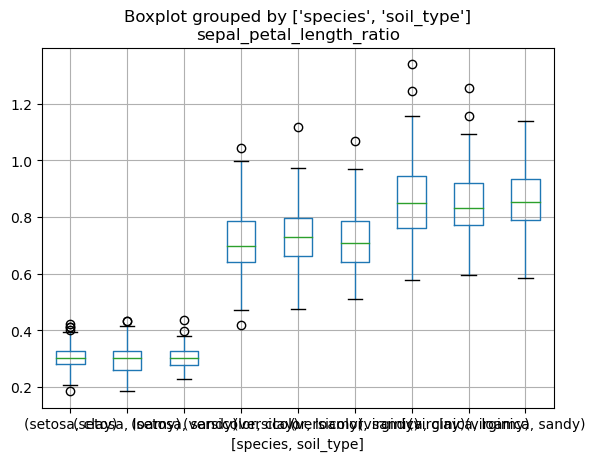

In [23]:
data.boxplot(column="sepal_petal_length_ratio", by = ["species", "soil_type"])

Latjuk, hogy fajokon belul sincs nagy szoras e tekintetben. Az x tengelyen a feliratok mondjuk nem szepen latszodnak, ezt orvosolhatjuk egy `rot=45`-el mondjuk:

<AxesSubplot:title={'center':'sepal_petal_length_ratio'}, xlabel='[species, soil_type]'>

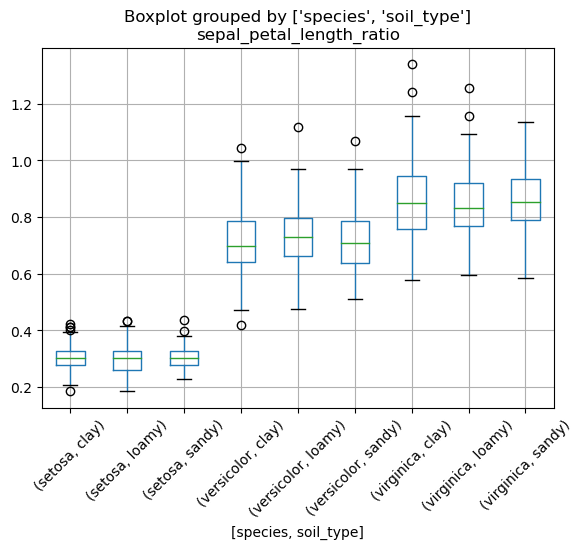

In [25]:
data.boxplot(column="sepal_petal_length_ratio", by = ["species", "soil_type"], rot=45)

De akkor nezzuk a szirmok, cseszelevelek abszolut hosszat, ezek hogy oszlanak el. Erre egy scatter plot tokeletes:

<AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>

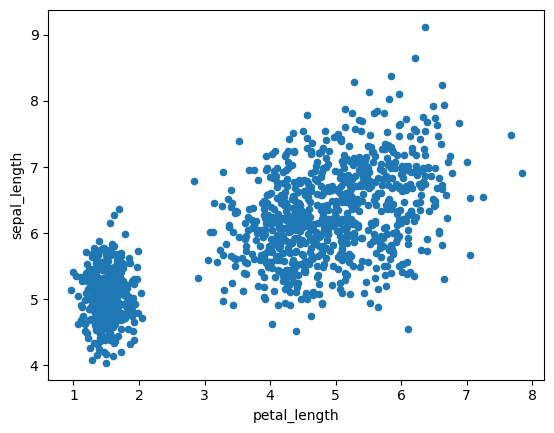

In [29]:
data.plot(x = "petal_length", y = "sepal_length", kind="scatter")

Az itt hasznalt `.plot(...)`, `.boxplot(...)` valojaban a korabbrol ismert  `matplotlib.pyplot`-ot hasznalja. A fenti diagrammot igy is megcsinalhattuk volna: 

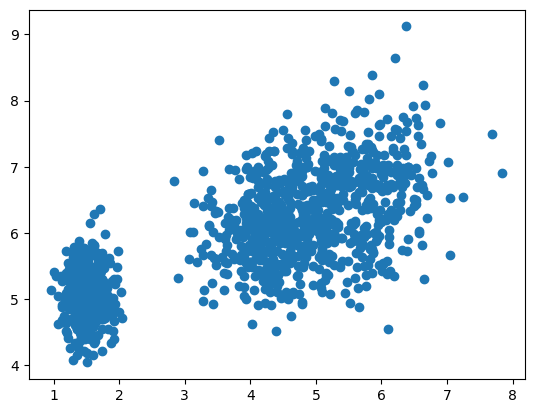

In [30]:
import matplotlib.pyplot as plt
plt.scatter(x = data["petal_length"], y = data["sepal_length"])

Hogy ki melyiket preferalja, egyeni izles kerdese.

Node, ez a diagram szep, de hasznos volna latni, hogy melyik pontok melyik fajhoz tartoznak. Ehhez a `c` argumentumnak meg kell adni az oszlopot, ahol az egyes elemeket szinezzuk. Ilyen oszlopunk meg nincs, tehat csinaljunk egyet. 

Eloszor adjuk meg szinek egy listajat (lehet hosszabb, hatha kerul tobb faj a csv fajlba):

In [37]:
colors = ['green', 'red', 'blue', 'gray', 'black', 'purple']

Az alabbi sor csinal egy dictionary-t, amiben az egyes fajokhoz hozzarendeli `colors` listabol az elso szineket.

In [40]:
coloring = dict(zip(species,colors[:len(species)]))
coloring

{'setosa': 'green', 'versicolor': 'red', 'virginica': 'blue'}

Ezutan csinaljunk egy `"species_color"` oszlopot, amit a `coloring` alapjan hataroz meg, ehhez a `.map()`-et hasznaljuk:

In [42]:
data["species_color"] = data["species"].map(coloring)

Ezek utan mar csak meg kell adni a `species_color` oszlopot a szinekhez:

<AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>

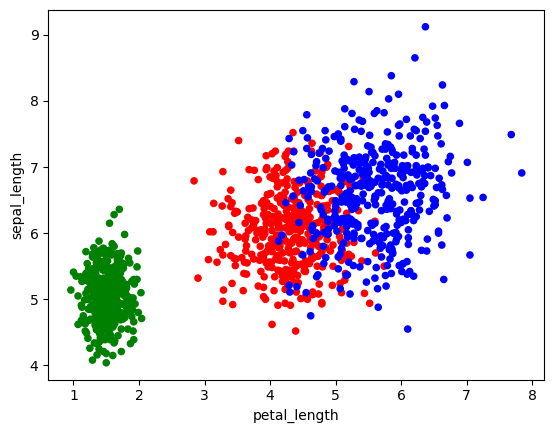

In [44]:
data.plot(x = "petal_length", y = "sepal_length", kind="scatter", c="species_color")

A fenti `.map()` helyett egy "fapados" megoldas, hogyha csinalunk egy uj oszlopot, ami a species masolata, es ott lecsereljuk az ertekeket:

In [46]:
data["colors2"] = data["species"]
data["colors2"].replace("setosa", "green", inplace=True)
data["colors2"].replace("virginica", "red", inplace=True)
data["colors2"].replace("versicolor", "blue", inplace=True)

Es akkor ezutan plotolunk:

<AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>

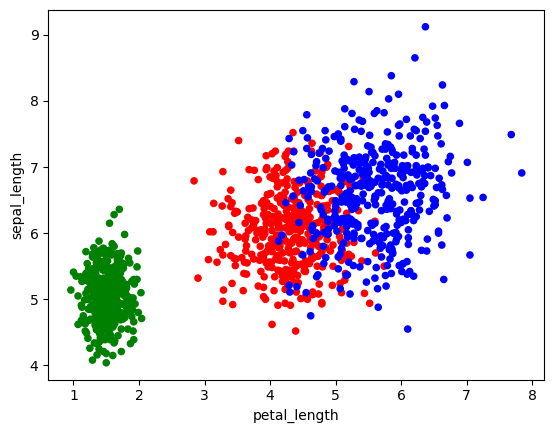

In [47]:
data.plot(x = "petal_length", y = "sepal_length", kind="scatter", c="species_color")

De vajon peldaul a `virginica` fajon belul latszik-e a talajtipus hatasa? Ehhez eloszor szurjuk le az adatokat azokra, amikben csak ezek a  viragok vannak benne:

In [48]:
virginica  = data[ data['species'] == "virginica"]

Majd erre keszitsuk el a szinezest a fentikenk megfeleloen:


/tmp/ipykernel_660604/1387300606.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  virginica["soil_color"] = virginica["soil_type"].map(soilcoloring)


<AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>

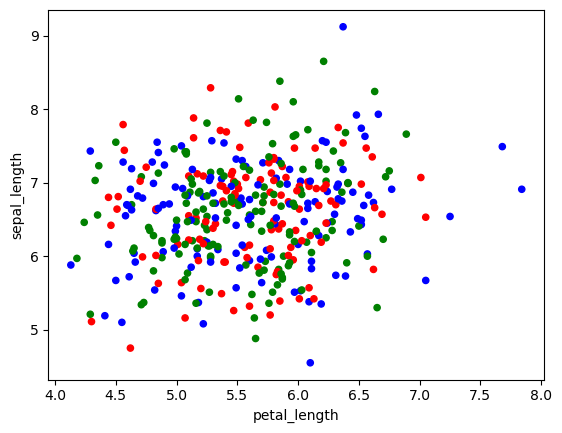

In [55]:
soils = virginica["soil_type"].unique()data
soilcoloring = dict(zip(soils,colors[:len(soils)]))
virginica["soil_color"] = virginica["soil_type"].map(soilcoloring)
virginica.plot(x = "petal_length", y = "sepal_length", kind="scatter", c="soil_color")



Ahogy latszik, ennel a fajnal a talajtipus nem igazan szamitott. Meg lehetne nezni, hogy a tobbinel is vajon igy van-e, ezert a szinezest akar az egesz adathalmazra megcsinalhatjuk:

In [56]:
data["soil_color"] = data["soil_type"].map(soilcoloring)

Es akkor a masik ket tipusra ugyanez a diagramm:

<AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>

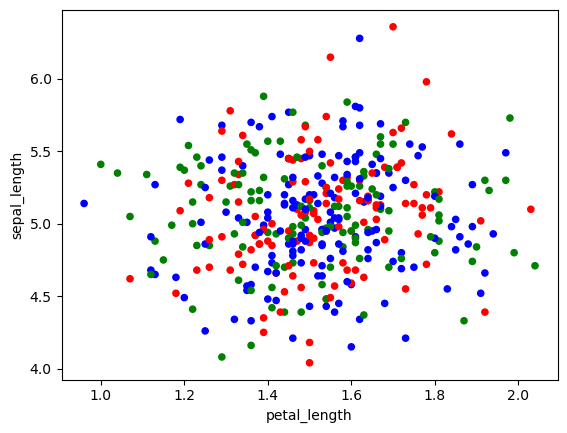

In [58]:
data[data["species"]=="setosa"].plot(x = "petal_length", y = "sepal_length", kind="scatter", c="soil_color")

<AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>

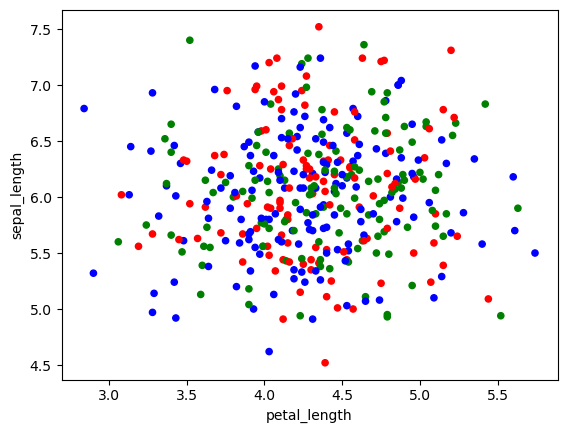

In [59]:
data[data["species"]=="versicolor"].plot(x = "petal_length", y = "sepal_length", kind="scatter", c="soil_color")

Elkonyvelheto, hogy a talajtipussal nem lathato szembetuno osszefugges egyik fajnal sem a szirmok/cseszelevelek hosszaval.

Hisztogram keszites is hasonloan konnyen megy:

array([[<AxesSubplot:title={'center':'petal_length'}>]], dtype=object)

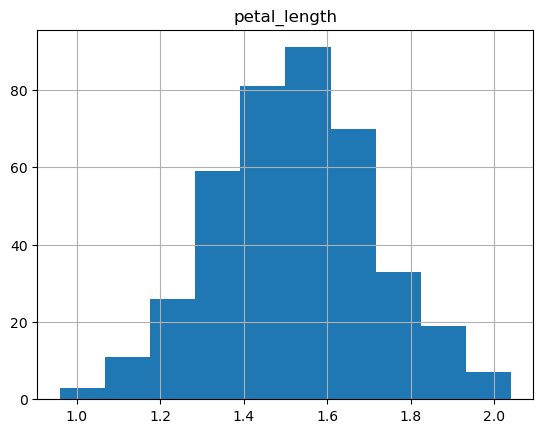

In [60]:
data[ data["species"] == "setosa"][['petal_length']].hist()
